In [ ]:
import os
path_root = os.getcwd()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/'

/content/drive/My Drive


In [ ]:
cp ml-proj.zip -r /content/data.zip

In [ ]:
os.chdir('/content')

In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/ml-proj/asl_alphabet_train/W/._W2815.jpg  
  inflating: ml-proj/asl_alphabet_train/W/W545.jpg  
  inflating: __MACOSX/ml-proj/asl_alphabet_train/W/._W545.jpg  
  inflating: ml-proj/asl_alphabet_train/W/W2801.jpg  
  inflating: __MACOSX/ml-proj/asl_alphabet_train/W/._W2801.jpg  
  inflating: ml-proj/asl_alphabet_train/W/W73.jpg  
  inflating: __MACOSX/ml-proj/asl_alphabet_train/W/._W73.jpg  
  inflating: ml-proj/asl_alphabet_train/W/W223.jpg  
  inflating: __MACOSX/ml-proj/asl_alphabet_train/W/._W223.jpg  
  inflating: ml-proj/asl_alphabet_train/W/W2197.jpg  
  inflating: __MACOSX/ml-proj/asl_alphabet_train/W/._W2197.jpg  
  inflating: ml-proj/asl_alphabet_train/W/W2829.jpg  
  inflating: __MACOSX/ml-proj/asl_alphabet_train/W/._W2829.jpg  
  inflating: ml-proj/asl_alphabet_train/W/W579.jpg  
  inflating: __MACOSX/ml-proj/asl_alphabet_train/W/._W579.jpg  
  inflating: ml-proj/asl_alphabet_train/W/W2183.jpg  
  infla

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, regularizers
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from keras.models import Sequential
from keras.optimizers import  Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
data_dir = "ml-proj/asl_alphabet_train"
test_dir = "ml-proj/asl_alphabet_test"
target_size = (128, 128)
target_dims = (128, 128, 3) # add channel for RGB
n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=val_frac,
                                    )

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

test_generator = data_augmentor.flow_from_directory(test_dir, target_size=target_size)

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 0 images belonging to 0 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=5, strides=1, activation='relu', input_shape=target_dims))
# model.add(Conv2D(64, kernel_size=5, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu'))
model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer = regularizers.l2()))
model.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2()))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])


In [ ]:
history = model.fit_generator(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
1224/1224 [==============================] - 126s 103ms/step - loss: 1.8480 - accuracy: 0.6515 - val_loss: 1.7926 - val_accuracy: 0.5341
Epoch 2/10
1224/1224 [==============================] - 125s 102ms/step - loss: 0.9757 - accuracy: 0.8564 - val_loss: 1.7789 - val_accuracy: 0.6431
Epoch 3/10
1224/1224 [==============================] - 125s 102ms/step - loss: 0.8063 - accuracy: 0.8934 - val_loss: 2.0364 - val_accuracy: 0.6163
Epoch 4/10
1224/1224 [==============================] - 126s 103ms/step - loss: 0.7040 - accuracy: 0.9111 - val_loss: 1.7535 - val_accuracy: 0.7071
Epoch 5/10
1224/1224 [==============================] - 126s 103ms/step - loss: 0.6469 - accuracy: 0.9223 - val_loss: 2.0763 - val_accuracy: 0.6961
Epoch 6/10
1224/1224 [==============================] - 126s 103ms/step - loss: 0.5925 - accuracy: 0.9302 - val_loss: 1.2955 - val_accuracy: 0.7132
Epoch 7/10
1224/1224 [==============================] - 125s 102ms/step - loss: 0.5684 - accuracy: 0.9322 - val_

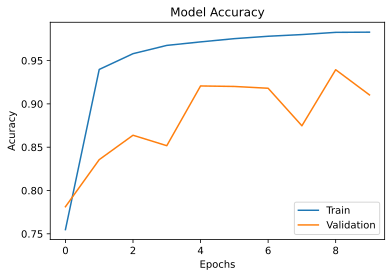

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acuracy")
plt.legend(['Train', 'Validation'])
plt.show()

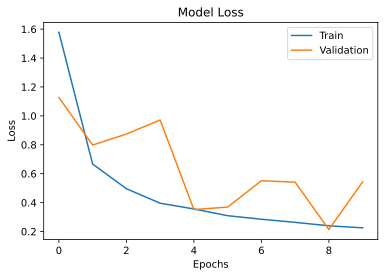

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
#data generator for Test

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 121, 121, 64)      12352     
_________________________________________________________________
dropout_1 (Dropout)          (None, 121, 121, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        262208    
_________________________________________________________________
dropout_2 (Dropout)          (None, 57, 57, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       524416    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 128)      

In [ ]:
from keras import backend as k
k.clear_session()

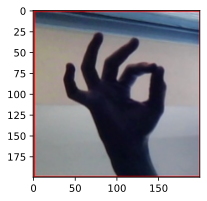

In [ ]:
#Sample Image

image_path = "ml-proj/asl_alphabet_train/F/F100.jpg"
import cv2

plt.figure(figsize=(3,4))
img = cv2.imread(image_path)
plt.imshow(img)

In [ ]:
#test
test_array = np.zeros((200, 200, 29))
for i in os.listdir("ml-proj/asl_alphabet_test"):
        if i == ".DS_Store":
            continue
        else:
            img = cv2.imread("ml-proj/asl_alphabet_test/"+i)
            img = cv2.resize(img, (128, 128))
            print(img.shape)
            print("Actual class: {} predicted class: {}".format(i, model.predict([[img]])))


(128, 128, 3)
Actual class: A_test.jpg predicted class: [[5.97865295e-08 1.79119851e-07 1.34981565e-05 1.57819977e-05
  2.18649618e-02 2.62553767e-05 4.81286293e-07 7.28701343e-05
  7.62674927e-06 2.16922267e-08 2.04616879e-09 5.55352867e-03
  2.93667767e-06 2.46762261e-06 8.67076591e-03 8.07031393e-01
  1.29633605e-01 2.59401626e-03 1.95315079e-04 1.10897622e-06
  2.34515266e-03 3.22030601e-03 1.84411729e-05 1.30571483e-03
  1.74164325e-02 9.47030809e-09 5.17329170e-07 3.82956523e-06
  2.84214821e-06]]
(128, 128, 3)
Actual class: X_test.jpg predicted class: [[1.63343611e-06 1.42616295e-06 1.14937880e-04 2.15215769e-05
  2.21345332e-02 1.55367161e-04 7.83889700e-05 3.81091086e-04
  1.05982828e-04 1.91577925e-07 4.70497330e-09 2.44640708e-02
  6.24958557e-06 2.20113347e-04 3.39975022e-03 2.58381486e-01
  4.42036957e-01 1.76829018e-03 4.12467372e-04 8.89040984e-06
  2.10188492e-03 1.85634494e-02 1.19457014e-04 9.60232783e-03
  2.15412915e-01 3.32941909e-07 1.54090088e-07 5.03978517e-04
 

In [ ]:
# pred = model.predict_generator(test_generator)
img, labels = next(test_generator)
print(img.shape," ", labels.shape)
tesRes = model.test_on_batch(img, labels)
print(tesRes)

(28, 128, 128, 3)   (28, 29)
[21.369019, 0.0]


In [ ]:
model.metrics_names

['loss', 'accuracy']